Cats and dogs, dataset from
https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

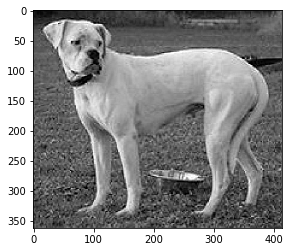

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/samuel/Descargas/PetImages"
CATEGORIES = ["Dog" , "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to cats or dog directorie
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #creates an array of all images
        #scaling to grey from RGB to work with less data, as color should not be a difference between cats and dogs
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array)

[[  9  10  11 ...  85  93 104]
 [  7   8   9 ...  80  86  97]
 [ 24  25  25 ... 124 123 115]
 ...
 [ 47  60  75 ...  76  73  71]
 [ 44  56  69 ...  49  51  56]
 [ 45  57  70 ...  55  56  58]]


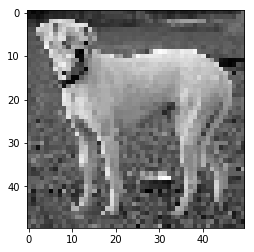

In [9]:
#we have to resize every picture to be the same size, try different sizes and see how they look

IMG_SIZE= 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [16]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to cats or dog directorie
        class_num = CATEGORIES.index(category) # classify dogs as 0, cats as 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #creates an array of all images
                #scaling to grey from RGB to work with less data, as color should not be a difference between cats and dogs
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            #there are broken images in the dataset, just ignore them
            
create_training_data()

In [14]:
print(len(training_data))

24946


In [18]:
#if we train with all the dogs first, the NN is goin to learn to just predic dog, when the cats come, just predict cat, so its better to shuffle them
import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
0
0
0
1


In [22]:
X = []
y= []

In [23]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1) 
# transforming X to be a numpy array, -1 fits for every size, 1 for grayscale


In [24]:
import pickle
#save all the data locally to avoid crunching all the data every time we execute

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [26]:
X[1]

array([[[ 4],
        [94],
        [ 9],
        ...,
        [19],
        [40],
        [61]],

       [[ 4],
        [86],
        [ 6],
        ...,
        [64],
        [65],
        [67]],

       [[ 6],
        [ 8],
        [ 8],
        ...,
        [81],
        [73],
        [79]],

       ...,

       [[26],
        [27],
        [30],
        ...,
        [23],
        [16],
        [20]],

       [[25],
        [28],
        [30],
        ...,
        [20],
        [19],
        [15]],

       [[24],
        [27],
        [24],
        ...,
        [22],
        [21],
        [17]]], dtype=uint8)